średni czas:  0.0005129098892211914
Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630
Number of generations:  33


/opt/homebrew/lib/python3.10/site-packages/pygad/pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=8) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


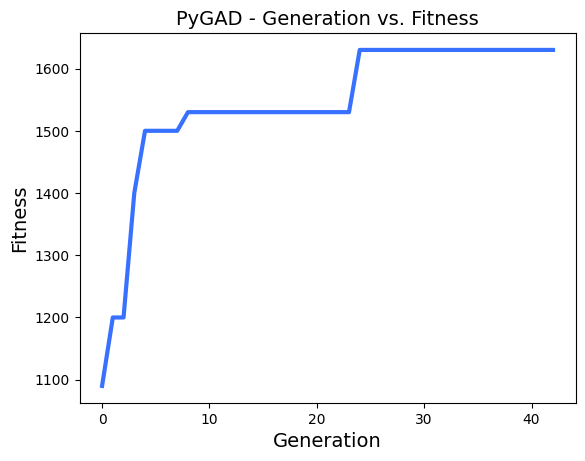

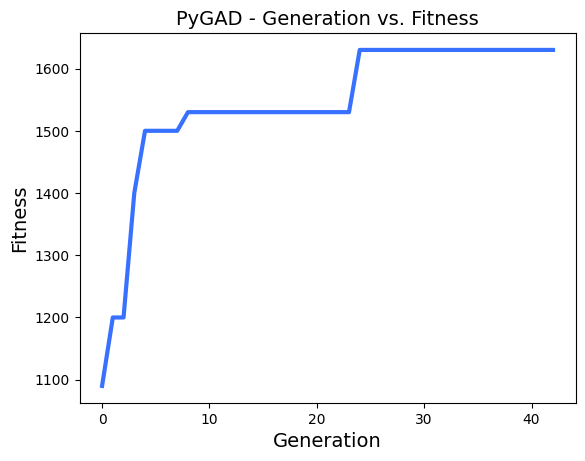

In [1]:
import pygad
import numpy as np
import time


items = [{'item': 'zegar', 'value': 100, 'weight': 7},
         {'item': 'obraz-pejzaż', 'value': 300, 'weight': 7},
         {'item': 'obraz-portret', 'value': 200, 'weight': 6},
         {'item': 'radio', 'value': 40, 'weight': 2},
         {'item': 'laptop', 'value': 500, 'weight': 5},
         {'item': 'lampka nocna', 'value': 70, 'weight': 6},
         {'item': 'srebrne sztućce', 'value': 100, 'weight': 1},
         {'item': 'porcelana', 'value': 250, 'weight': 3},
         {'item': 'figura z brązu', 'value': 300, 'weight': 10},
         {'item': 'skórzana torebka', 'value': 280, 'weight': 3},
         {'item': 'odkurzacz', 'value': 300, 'weight': 15}]

gene_space = [0, 1]
max_weight = 25

# solution = chromosom
def fitness_func(solution, solution_idx):
    sum_value = 0
    for x in range(len(solution)):
        if solution[x] == 1:
            sum_value += items[x]['value']
    sum_weight = 0
    for x in range(len(solution)):
        if solution[x] == 1:
            sum_weight += items[x]['weight']
            
    if sum_weight > 25:
        return 0
    else:
        return sum_value
    
fitness_function = fitness_func

# ile chromsomów w populacji
# ile genow ma chromosom
sol_per_pop = 10 # solutions per populations
num_genes = len(items)

# ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
# ile pokolen
# ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5 # number of parents
num_generations = 30
keep_parents = 2

# jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

# w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

# mutacja ma dzialac na ilu procent genow?
# trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 8

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria=["reach_1600"],)

# uruchomienie algorytmu
czasy = []

for i in range(10):
    start = time.time()
    ga_instance.run()
    end = time.time()
    czasy.append(end-start)

print("średni czas: ", np.mean(czasy))
# podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))
print("Number of generations: ", ga_instance.generations_completed)



# tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
# prediction = np.sum(S*solution)
# print("Predicted output based on the best solution : {prediction}".format(
#     prediction=prediction))

# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()


